In [3]:
import numpy as np
faces_image = np.load('../Face_Recognition/input/Olivetti_Faces/olivetti_faces.npy')
faces_target = np.load('../Face_Recognition/input/Olivetti_Faces/olivetti_faces_target.npy')

In [4]:
#print(faces_image)
faces_image

array([[[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083,
         0.3305785 , 0.30578512],
        [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083,
         0.338843  , 0.3140496 ],
        [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528,
         0.338843  , 0.29752067],
        ...,
        [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256,
         0.16528925, 0.17355372],
        [0.20247933, 0.2107438 , 0.2107438 , ..., 0.14876033,
         0.16115703, 0.16528925],
        [0.20247933, 0.20661157, 0.20247933, ..., 0.15289256,
         0.16115703, 0.1570248 ]],

       [[0.45454547, 0.47107437, 0.5123967 , ..., 0.19008264,
         0.18595041, 0.18595041],
        [0.446281  , 0.48347107, 0.5206612 , ..., 0.21487603,
         0.2107438 , 0.2107438 ],
        [0.49586776, 0.5165289 , 0.53305787, ..., 0.20247933,
         0.20661157, 0.20661157],
        ...,
        [0.77272725, 0.78099173, 0.7933884 , ..., 0.1446281 ,
         0.1446281 , 0.1446281 ],
        [0.7

In [5]:
n_row = 64
n_col = 64
faces_image.shape

(400, 64, 64)

In [6]:
faces_data = faces_image.reshape(faces_image.shape[0], faces_image.shape[1] * faces_image.shape[2])
faces_data.shape

(400, 4096)

In [7]:
print(faces_target)

[ 0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  2  2  2  2
  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4
  4  4  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  7  7
  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9
  9  9  9  9 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 14 14 14 14
 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16
 16 16 17 17 17 17 17 17 17 17 17 17 18 18 18 18 18 18 18 18 18 18 19 19
 19 19 19 19 19 19 19 19 20 20 20 20 20 20 20 20 20 20 21 21 21 21 21 21
 21 21 21 21 22 22 22 22 22 22 22 22 22 22 23 23 23 23 23 23 23 23 23 23
 24 24 24 24 24 24 24 24 24 24 25 25 25 25 25 25 25 25 25 25 26 26 26 26
 26 26 26 26 26 26 27 27 27 27 27 27 27 27 27 27 28 28 28 28 28 28 28 28
 28 28 29 29 29 29 29 29 29 29 29 29 30 30 30 30 30 30 30 30 30 30 31 31
 31 31 31 31 31 31 31 31 32 32 32 32 32 32 32 32 32

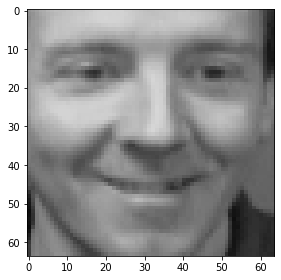

In [8]:
import warnings
warnings.filterwarnings("ignore")
from skimage.io import imshow
loadImage = faces_image[20]
imshow(loadImage) 

In [9]:
loadImage.shape

(64, 64)

**Faces recognition using eigenfaces and SVM**

In [10]:
from __future__ import print_function

from time import time
import logging
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC

In [11]:
n_samples = faces_image.shape[0]
# for machine learning we use the 2 data directly
X = faces_data
n_features = faces_data.shape[1]
# the label to predict is the id of the person
y = faces_target
n_classes = faces_target.shape[0]

In [12]:
print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)


Total dataset size:
n_samples: 400
n_features: 4096
n_classes: 400


In [13]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)
print("Xtrain",Xtrain)
print("Length of Xtrain:",len(Xtrain))
print("Xtest",Xtest)
print("Length of Xtest:",len(Xtest))
print("ytrain",ytrain)
print("Length of ytrain:",len(ytrain))
print("ytest",ytest)
print("Length of ytest:",len(ytest))


Xtrain [[0.28512397 0.29338843 0.29752067 ... 0.53305787 0.53305787 0.5371901 ]
 [0.42975205 0.4752066  0.5123967  ... 0.2892562  0.3140496  0.33471075]
 [0.38842976 0.46280992 0.553719   ... 0.1570248  0.15289256 0.18181819]
 ...
 [0.20661157 0.20661157 0.20661157 ... 0.2231405  0.3264463  0.3677686 ]
 [0.5        0.54545456 0.58264464 ... 0.17768595 0.17355372 0.17355372]
 [0.36363637 0.5495868  0.75206614 ... 0.11983471 0.12809917 0.1322314 ]]
Length of Xtrain: 300
Xtest [[0.21900827 0.28099173 0.5371901  ... 0.20247933 0.17768595 0.22727273]
 [0.75206614 0.7768595  0.7768595  ... 0.32231405 0.32231405 0.32231405]
 [0.44214877 0.4214876  0.446281   ... 0.2892562  0.28099173 0.27272728]
 ...
 [0.74380165 0.75619835 0.7644628  ... 0.3677686  0.35950413 0.37603307]
 [0.23553719 0.35123968 0.446281   ... 0.45454547 0.45867768 0.46280992]
 [0.45454547 0.47107437 0.5123967  ... 0.15289256 0.15289256 0.15289256]]
Length of Xtest: 100
ytrain [34 17 26 38  4  9 31 26 12 39  5 23 21  5  8 26 

In [14]:
# Compute a PCA (eigenfaces) on the olivetti dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction
n_components = 150

print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, Xtrain.shape[0]))
t0 = time()
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(Xtrain)
print("done in %0.3fs" % (time() - t0))

Extracting the top 150 eigenfaces from 300 faces
done in 0.560s


In [15]:
eigenfaces = pca.components_.reshape((n_components, n_row, n_col))

print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
Xtrain_pca = pca.transform(Xtrain)
Xtest_pca = pca.transform(Xtest)
print("done in %0.3fs" % (time() - t0))


Projecting the input data on the eigenfaces orthonormal basis
done in 0.015s


In [16]:
# Train a SVM classification model

print("Fitting the classifier to the training set")
t0 = time()
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
clf = clf.fit(Xtrain_pca, ytrain)
print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)


Fitting the classifier to the training set
done in 2.945s
Best estimator found by grid search:
SVC(C=1000.0, class_weight='balanced', gamma=0.001)


In [17]:
# Quantitative evaluation of the model quality on the test set

print("Predicting people's names on the test set")
t0 = time()
y_pred = clf.predict(Xtest_pca)
print("done in %0.3fs" % (time() - t0))

print(classification_report(ytest, y_pred))


Predicting people's names on the test set
done in 0.007s
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         4
           8       1.00      1.00      1.00         4
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         1
          16       1.00      1.00      1.00         1
          17       1.00      1.00      1.00         3
          18       1.00 

In [18]:
print(confusion_matrix(ytest, y_pred, labels=range(n_classes)))

[[3 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 4 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


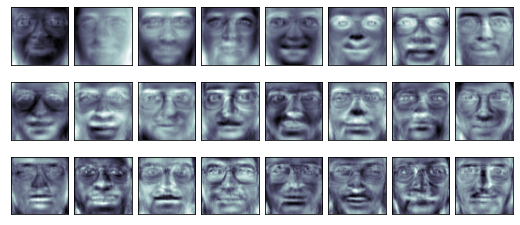

In [19]:
#Displaying Eigenfaces
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(64, 64), cmap='bone')

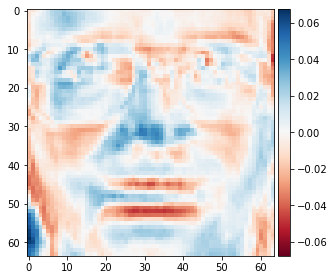

In [20]:
loadeigen = eigenfaces[20]
imshow(loadeigen) 

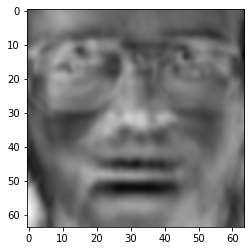

In [21]:
# plot the single eigen face of the most significative eigenfaces
import cv2
img = cv2.imread('loadeigen',0)
plt.imshow(loadeigen,cmap = 'gray', interpolation = 'bicubic')
plt.show()

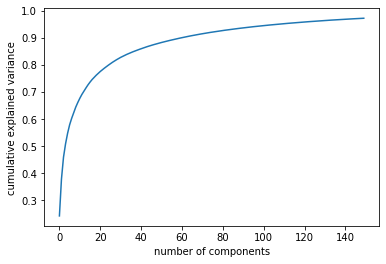

In [22]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

We see that these 150 components account for just over 90% of the variance. That would lead us to believe that using these 150 components, we would recover most of the essential characteristics of the data. To make this more concrete, we can compare the input images with the images reconstructed from these 150 components.

Please help with suggestions to improve this article